In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("hr_raw_data_limpio_.csv", index_col = 0)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,RoleDepartament,RemoteWork
0,51,No,NaN,684.0,NaN,6,High School,NaN,162.0,Very Low,Male,51.0,Medium,Director,Research Director,Medium,NaN,19537.0,6462,7,No,13,"3,0",Medium,NaN,None,NaN,5,"3,0",20,15,15,NaN,Yes
1,52,No,NaN,699.0,NaN,1,Bachelor'S,Life Sciences,259.0,Medium,Male,65.0,Low,Director,Manager,Medium,NaN,19999.0,5678,0,NaN,14,"3,0",Very Low,NaN,Low,34.0,5,"3,0",33,11,9,NaN,Yes
2,42,No,Travel Rarely,532.0,Research & Development,4,Secondary,Technical Degree,319.0,Medium,Male,58.0,Medium,Director,Manager,High,Married,19232.0,4933,1,No,11,"3,0",High,NaN,None,22.0,3,NaN,22,11,15,Manager Research & Development,Yes
3,47,No,Travel Rarely,359.0,NaN,2,Bachelor'S,Medical,NaN,Very Low,Female,82.0,Medium,Manager,Research Director,Medium,Married,17169.0,26703,3,NaN,19,"3,0",Low,NaN,Medium,NaN,2,NaN,20,5,6,NaN,No
4,46,No,NaN,1319.0,NaN,3,High School,Technical Degree,NaN,Very Low,Female,45.0,High,Manager,Sales Executive,Very Low,Divorced,NaN,7739,2,No,12,"3,0",High,NaN,Low,NaN,5,"3,0",19,2,8,NaN,No


In [3]:
from itertools import combinations

# definimos la lista los nombres de las variables numéricas 
numericas = df.select_dtypes(include = np.number).columns

# usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas
combinaciones = list(combinations(numericas, 2))

# printeamos los resultados, una lista de tuplas
combinaciones

[('Age', 'DailyRate'),
 ('Age', 'DistanceFromHome'),
 ('Age', 'EmployeeNumber'),
 ('Age', 'HourlyRate'),
 ('Age', 'MonthlyIncome'),
 ('Age', 'MonthlyRate'),
 ('Age', 'NumCompaniesWorked'),
 ('Age', 'PercentSalaryHike'),
 ('Age', 'StandardHours'),
 ('Age', 'TotalWorkingYears'),
 ('Age', 'TrainingTimesLastYear'),
 ('Age', 'YearsAtCompany'),
 ('Age', 'YearsSinceLastPromotion'),
 ('Age', 'YearsWithCurrManager'),
 ('DailyRate', 'DistanceFromHome'),
 ('DailyRate', 'EmployeeNumber'),
 ('DailyRate', 'HourlyRate'),
 ('DailyRate', 'MonthlyIncome'),
 ('DailyRate', 'MonthlyRate'),
 ('DailyRate', 'NumCompaniesWorked'),
 ('DailyRate', 'PercentSalaryHike'),
 ('DailyRate', 'StandardHours'),
 ('DailyRate', 'TotalWorkingYears'),
 ('DailyRate', 'TrainingTimesLastYear'),
 ('DailyRate', 'YearsAtCompany'),
 ('DailyRate', 'YearsSinceLastPromotion'),
 ('DailyRate', 'YearsWithCurrManager'),
 ('DistanceFromHome', 'EmployeeNumber'),
 ('DistanceFromHome', 'HourlyRate'),
 ('DistanceFromHome', 'MonthlyIncome'),
 ('

In [4]:
# creamos una función para identificar si las relaciones entre las variables son lienales o no
def identificar_linealidad (dataframe, lista_combinacion_columnas):
    """
    Identifica si las relaciones entre pares de variables en un DataFrame son lineales o no.
   lista_combinacion_columnas : list of tuples
        Una lista de tuplas donde cada tupla contiene dos nombres de columnas del DataFrame que se desea analizar.

    Returns:
    --------
    relaciones_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que tienen una relación lineal.

    relaciones_no_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que no tienen una relación lineal.

    """
    relaciones_lineales = []
    relaciones_no_lineales = []
    for tupla in lista_combinacion_columnas: 
        # Realizar la prueba de normalidad
        _, p_value1 = kstest(dataframe[tupla[0]], "norm")
        _, p_value2 = kstest(dataframe[tupla[1]], "norm")

        if p_value1 > 0.05 and p_value2 > 0.05:
            relaciones_lineales.append(tupla)
        else:
            relaciones_no_lineales.append(tupla)

    return relaciones_lineales, relaciones_no_lineales

# llamamos a la funcion

lineal, no_lineal = identificar_linealidad(df, combinaciones)

print(f"Las variables a las que tengamos que aplicar la correlacion de pearson son: {lineal}")
print(f"Las variables a las que tengamos que aplicar la correlacion de spearman son: {no_lineal}")

Las variables a las que tengamos que aplicar la correlacion de pearson son: []
Las variables a las que tengamos que aplicar la correlacion de spearman son: [('Age', 'DailyRate'), ('Age', 'DistanceFromHome'), ('Age', 'EmployeeNumber'), ('Age', 'HourlyRate'), ('Age', 'MonthlyIncome'), ('Age', 'MonthlyRate'), ('Age', 'NumCompaniesWorked'), ('Age', 'PercentSalaryHike'), ('Age', 'StandardHours'), ('Age', 'TotalWorkingYears'), ('Age', 'TrainingTimesLastYear'), ('Age', 'YearsAtCompany'), ('Age', 'YearsSinceLastPromotion'), ('Age', 'YearsWithCurrManager'), ('DailyRate', 'DistanceFromHome'), ('DailyRate', 'EmployeeNumber'), ('DailyRate', 'HourlyRate'), ('DailyRate', 'MonthlyIncome'), ('DailyRate', 'MonthlyRate'), ('DailyRate', 'NumCompaniesWorked'), ('DailyRate', 'PercentSalaryHike'), ('DailyRate', 'StandardHours'), ('DailyRate', 'TotalWorkingYears'), ('DailyRate', 'TrainingTimesLastYear'), ('DailyRate', 'YearsAtCompany'), ('DailyRate', 'YearsSinceLastPromotion'), ('DailyRate', 'YearsWithCurrMa

In [5]:
# como todas las parejas de variables tienen relaciones no lineales, aplicaremos la correlación de Spearman a todo el DataFrame
df_correlaciones = df.corr( method = "spearman")
df_correlaciones

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.006265,-0.018802,-0.002102,0.025143,0.480392,0.024349,0.338368,0.013307,NaN,0.640693,-0.011728,0.254005,0.171217,0.190263
DailyRate,-0.006265,1.000000,0.015594,-0.009083,0.025273,0.001813,-0.022646,0.034305,0.023501,NaN,0.070828,-0.013384,-0.017182,-0.042162,-0.007030
DistanceFromHome,-0.018802,0.015594,1.000000,0.022422,0.018312,-0.058785,0.019217,0.022006,0.048240,NaN,-0.031538,-0.052078,-0.015424,-0.024378,-0.014242
EmployeeNumber,-0.002102,-0.009083,0.022422,1.000000,0.004968,-0.055761,-0.000912,-0.020975,0.047668,NaN,-0.011226,0.017754,-0.008918,-0.011322,-0.014986
HourlyRate,0.025143,0.025273,0.018312,0.004968,1.000000,-0.033974,0.013599,0.033510,-0.026102,NaN,-0.005891,-0.001624,-0.025770,-0.035017,-0.007750
MonthlyIncome,0.480392,0.001813,-0.058785,-0.055761,-0.033974,1.000000,0.075727,0.153080,0.014949,NaN,0.707530,-0.039952,0.483210,0.235062,0.389330
MonthlyRate,0.024349,-0.022646,0.019217,-0.000912,0.013599,0.075727,1.000000,0.029916,-0.011475,NaN,0.041548,-0.013342,-0.027006,-0.017603,-0.028211
NumCompaniesWorked,0.338368,0.034305,0.022006,-0.020975,0.033510,0.153080,0.029916,1.000000,0.003944,NaN,0.335471,-0.061361,-0.178405,-0.072908,-0.152027
PercentSalaryHike,0.013307,0.023501,0.048240,0.047668,-0.026102,0.014949,-0.011475,0.003944,1.000000,NaN,-0.043634,-0.006180,-0.051566,-0.050944,-0.018876
StandardHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. **Correlación Débil**:

   - El valor absoluto del coeficiente de correlación está cerca de 0.

   - Por lo general, se considera una correlación débil si el valor absoluto está por debajo de 0.3.

2. **Correlación Moderada**:

   - El valor absoluto del coeficiente de correlación está en el rango de 0.3 a 0.7.

   - Se considera una correlación moderada si el valor absoluto está en este rango.

3. **Correlación Fuerte**:

   - El valor absoluto del coeficiente de correlación es igual o superior a 0.7.

   - Se considera una correlación fuerte si el valor absoluto está en este rango.

Age - Correlacíon debil en general, a veces poisitiva y otras negativa, y correlacion moderada con : MontlyIncome, NumCompaniesWorked y TotalWorkinYears

#### DailyRate - Correlaciones debiles en algunos casos negativas y en otros positivas   "COMO NO HAY CORRELACIONES SE PUEDE ELIMINAR LA COLUMNA"

DistanceFromHome -  Correlaciones debiles positivas y negativas

EmployeeNumber - Correlaciones debiles positivas y negativas

#### HourlyRate - Correlaciones debiles positivas y negativas

#### MonthlyIncome - Correlaciones debiles positivas y negativas en general, correlación moderada con Age, YearsAtCompany y YearsWithCurr Manager, 
#### correlación fuerte con TotalWorkingYears

#### MonthlyRate - Todas las correalciones son debiles, positivas y negativas

NumCompaniesWorked - Correlaciones debiles positivas y negativas y correlacion moderada con : Age y TotalWorkingYears

PercentSalaryHike - Correlaciones debiles positivas y negativas

StandardHours - aparece NaN hay que ver que pasa aquí

TotalWorkingYears - Correlaciones debiles positivas y negativas y correlaciones moderadas con: Age,  NumCompaniesWorked, YearsAtCompany,

YearsSinceLastPromotion y YearsWithCurrManager, correlación fuerte con : MontlyIncome

TrainingTimesLastYear - Correlaciones debiles positivas y negativas

YearsAtCompany - Correlaciones debiles positivas y negativas, correlaciones moderadas: MontlyIncome, TotalWorkingYears, YearsSinceLastPromotion y correlación fuerte con YearsWithCurrManager

YearsSinceLastPromotion - Correlaciones debiles positivas y negativas, correlaciones moderadas : TotalWorkingYears y YearsAtCompany

YearsWithCurrManager - Correlaciones debiles positivas y negativas, correlaciones moderadas : MontlyIncome, TotalWorkingYears y YearsSinceLastPromotion, correlacion fuerte con : YearsAtCompany



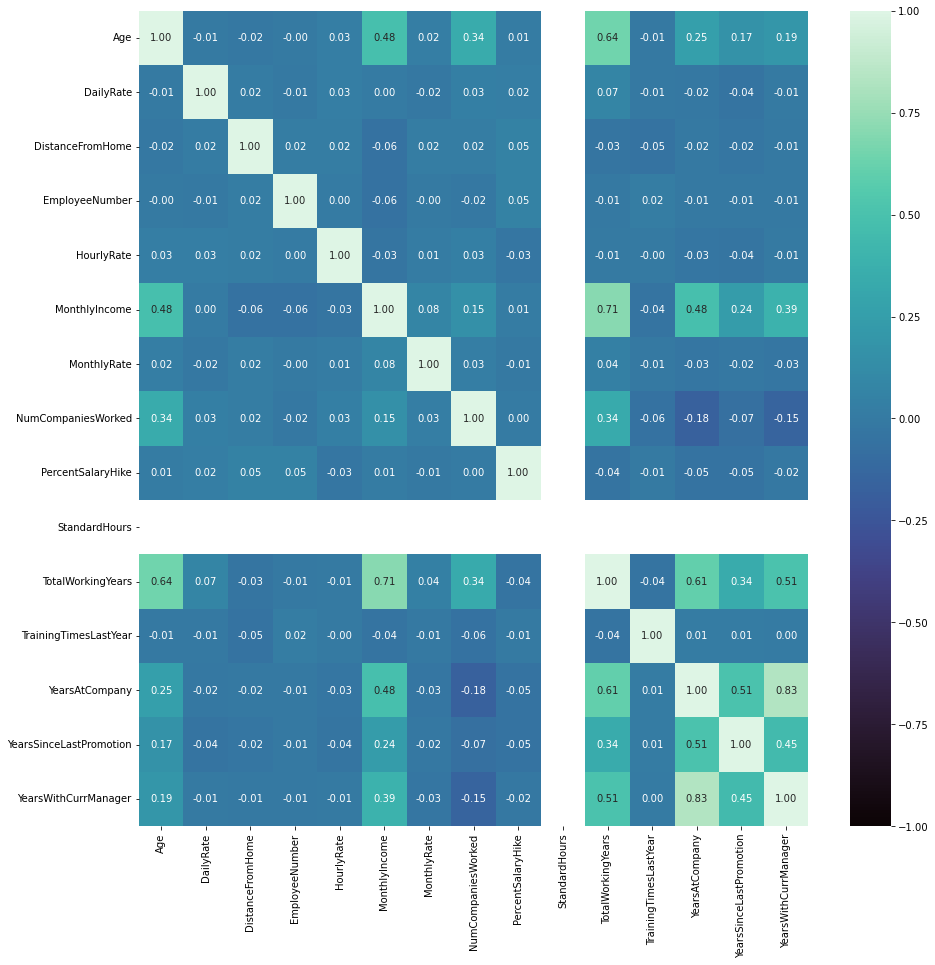

In [7]:
# establecemos el tamaño de la gráfica
plt.figure(figsize = (15, 15))

# convertimos nuestra matriz de correlación a una gráfica
sns.heatmap(df_correlaciones, 
            annot = True, 
            fmt = ".2f",  
            cmap = "mako", 
            vmax = 1,
            vmin = -1); 

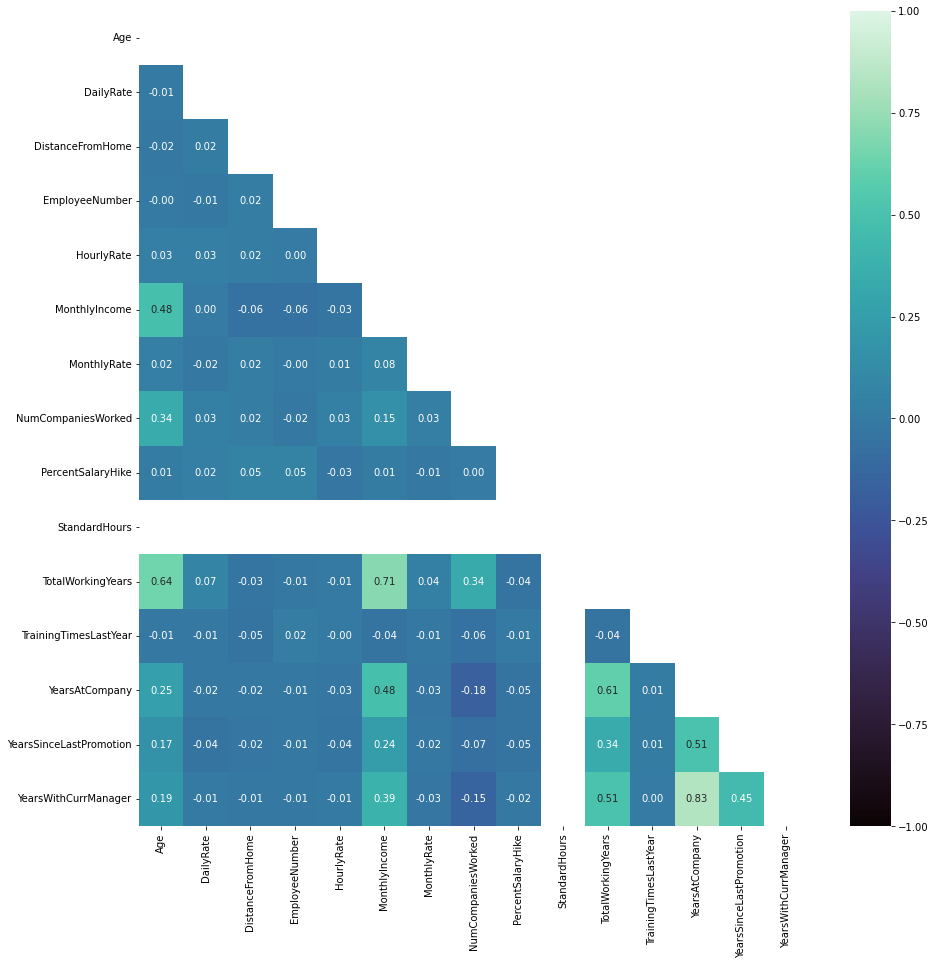

In [8]:

# establecemos el tamaño de la gráfica
plt.figure(figsize = (15, 15))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_correlaciones, dtype=bool))

# creamos un heatmap con la máscara
sns.heatmap(df_correlaciones, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 